In [267]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobathon-may-2021/train_s3TEQDk.csv
/kaggle/input/jobathon-may-2021/sample_submission_eyYijxG.csv
/kaggle/input/jobathon-may-2021/test_mSzZ8RL.csv


### Step 1: Importing the Relevant Libraries

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [269]:
train = pd.read_csv('../input/jobathon-may-2021/train_s3TEQDk.csv')
test = pd.read_csv('../input/jobathon-may-2021/test_mSzZ8RL.csv')

In [270]:
train.shape,test.shape

((245725, 11), (105312, 10))

In [271]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [273]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [274]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [275]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [276]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


### Step 3: Exploratory Data Analysis

In [277]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [278]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


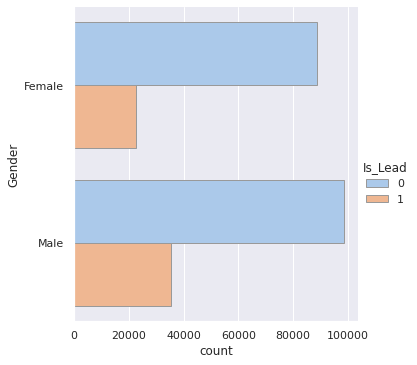

In [279]:
sns.catplot(y="Gender", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train)

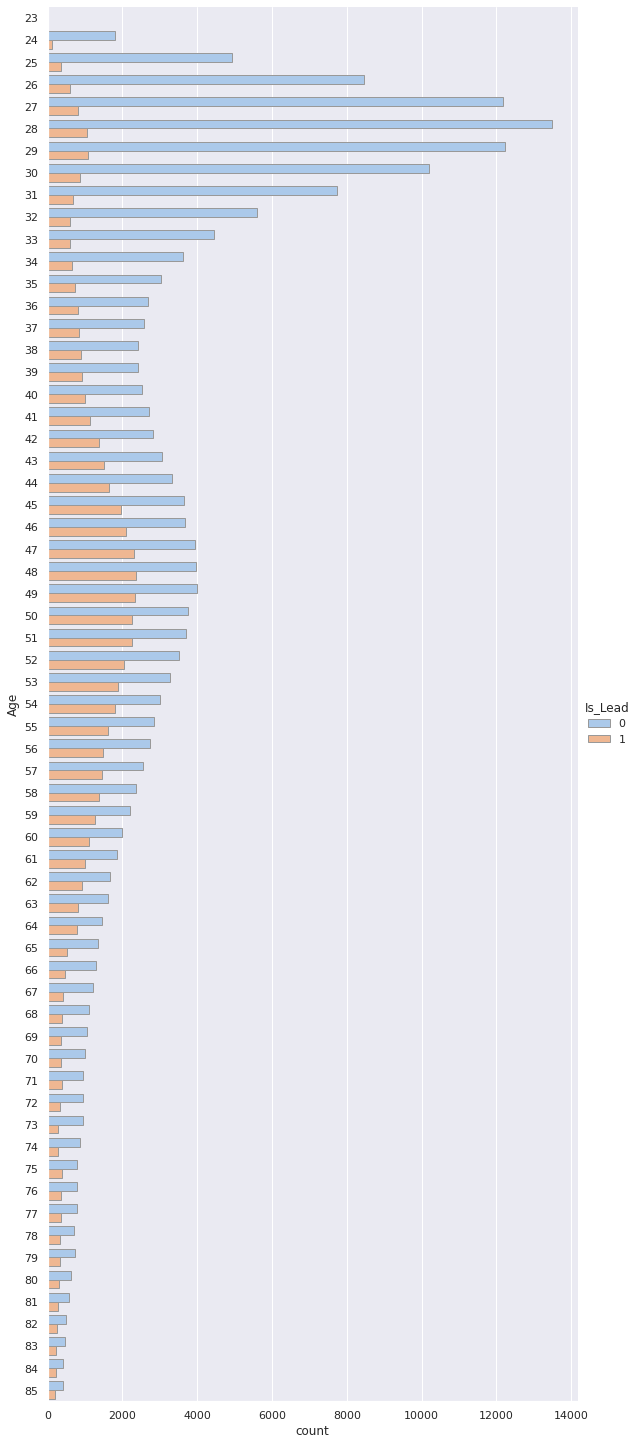

In [280]:
sns.catplot(y="Age", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train, height=20, aspect=.4)

<AxesSubplot:xlabel='Age', ylabel='Density'>

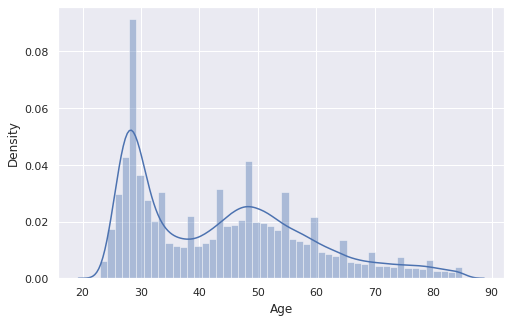

In [281]:
plt.figure(figsize=(8,5))
sns.distplot(train['Age'])

#### Log transformation

<AxesSubplot:xlabel='Age', ylabel='Density'>

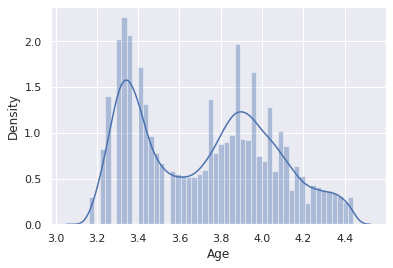

In [282]:
train['Age'] = np.log(train['Age'])
sns.distplot(train['Age'])

In [283]:
test['Age'] = np.log(test['Age'])

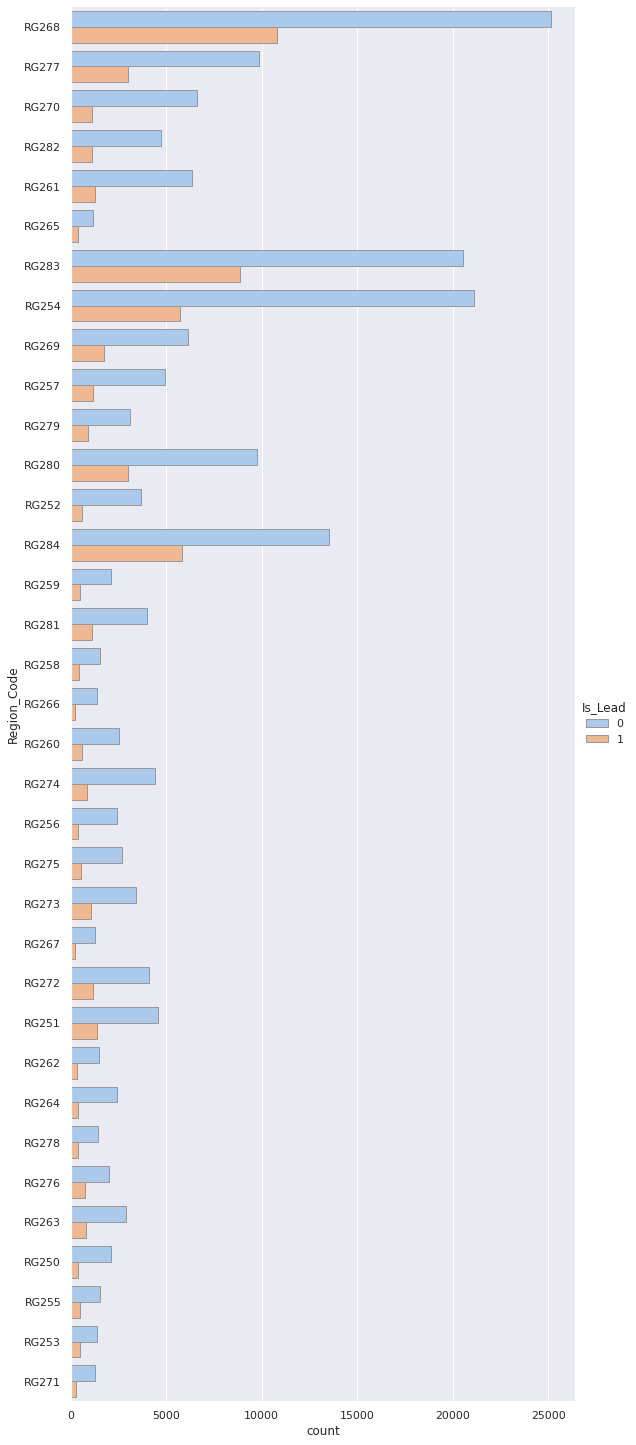

In [284]:
sns.catplot(y="Region_Code", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train, height=20, aspect=.4)

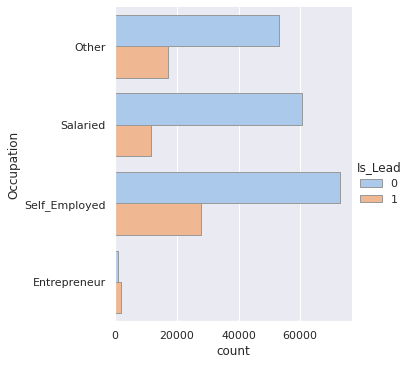

In [285]:
sns.catplot(y="Occupation", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train)

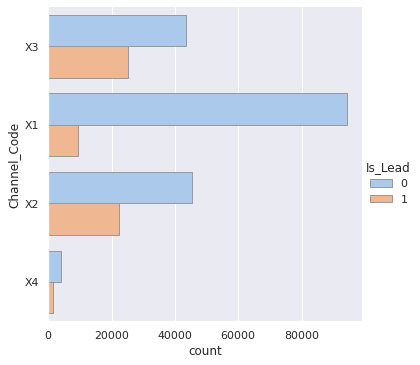

In [286]:
sns.catplot(y="Channel_Code", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train)

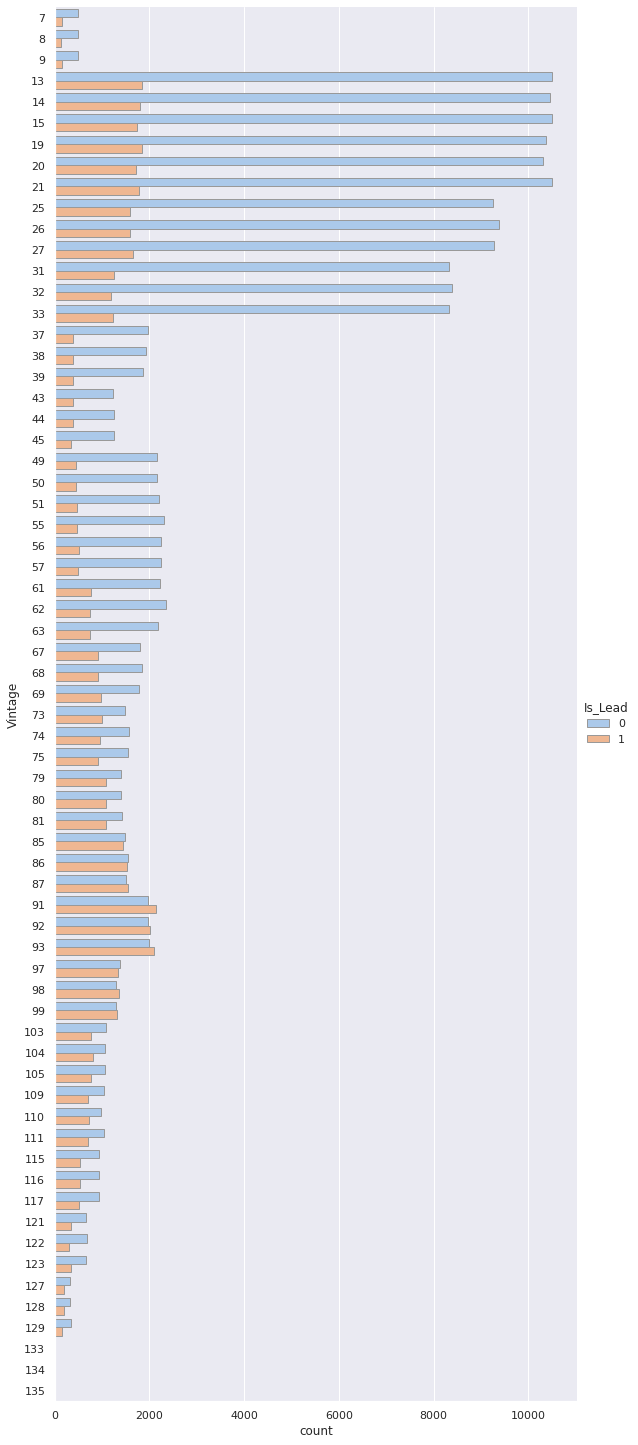

In [287]:
sns.catplot(y="Vintage", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train, height=20, aspect=.4)

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

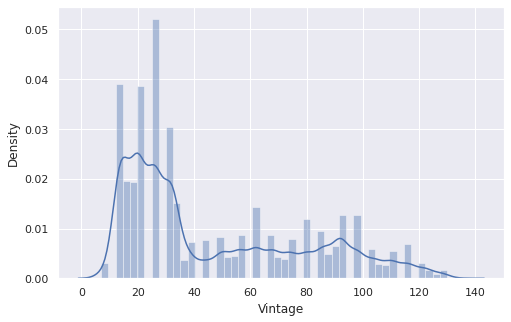

In [288]:
plt.figure(figsize=(8,5))
sns.distplot(train['Vintage'])

#### Log transformation

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

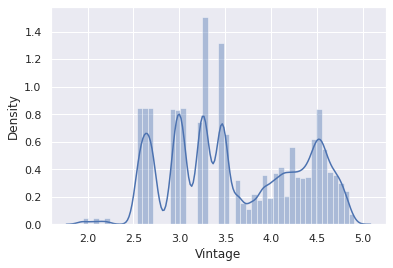

In [289]:
train['Vintage'] = np.log(train['Vintage'])
sns.distplot(train['Vintage'])

In [290]:
test['Vintage'] = np.log(test['Vintage'])

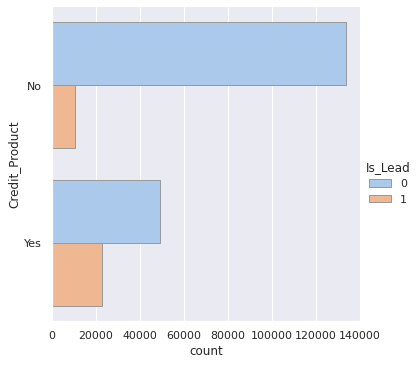

In [291]:
sns.catplot(y="Credit_Product", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

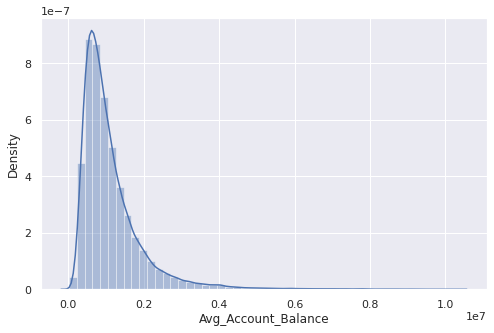

In [292]:
plt.figure(figsize=(8,5))
sns.distplot(train['Avg_Account_Balance'])

#### Log transformation

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

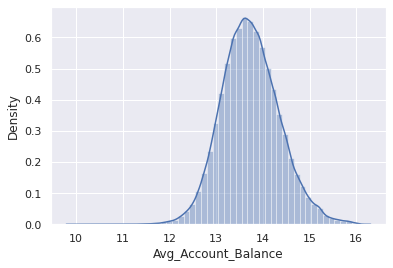

In [293]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
sns.distplot(train['Avg_Account_Balance'])

In [294]:
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])

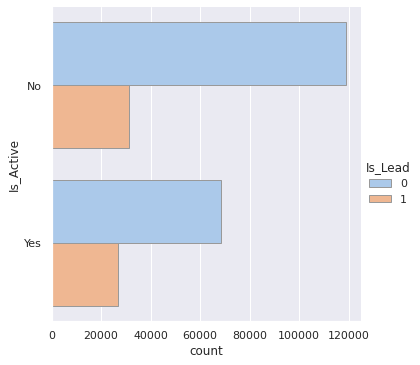

In [295]:
sns.catplot(y="Is_Active", hue="Is_Lead", kind="count", palette="pastel", edgecolor="0.6",data=train)

#### Dropping Variables

In [296]:
train.drop(['ID', 'Region_Code'], axis=1, inplace=True)
test.drop(['ID', 'Region_Code'], axis=1, inplace=True)

#### One Hot Encoding

In [297]:
train = pd.get_dummies(train, columns=['Gender','Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active'])

In [298]:
test = pd.get_dummies(test, columns=['Gender','Occupation','Channel_Code','Credit_Product' , 'Is_Active'])

In [299]:
train.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead', 'Gender_Female',
       'Gender_Male', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X1',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_No', 'Credit_Product_Yes', 'Is_Active_No',
       'Is_Active_Yes'],
      dtype='object')

In [300]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [301]:
# Seperate Features and Target
X= train.drop(columns = ['Is_Lead'], axis=1)
y= train['Is_Lead']

In [302]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

### Step 4: Model Building

In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [304]:
algos = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(),GaussianNB(),SGDClassifier(),SVC()]

names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'XG Boost Classifier','GaussianNB','SGDClassifier','SVC']

roc_auc_score_list = []

In [305]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    ROC_AUC_SCORE= roc_auc_score(y_valid,y_pred)
    roc_auc_score_list.append(ROC_AUC_SCORE)

[15:33:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [306]:
evaluation = pd.DataFrame({'Model': names,
                           'ROC_AUC_SC': roc_auc_score_list})

In [307]:
evaluation

,Model,ROC_AUC_SC
0,Logistic Regression,0.723203
1,Decision Tree Classifier,0.708538
2,Random Forest Classifier,0.749180
3,XG Boost Classifier,0.754866
4,GaussianNB,0.724622
5,SGDClassifier,0.707375
6,SVC,0.703429


It has been observed that **XG Boost Classifier** is performing better incomparison to other models.

#### Futher improving ROC_AUC_SCORE : Cat Boost Classifier

In [308]:
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300

In [309]:
train.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead', 'Gender_Female',
       'Gender_Male', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X1',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_No', 'Credit_Product_Yes', 'Is_Active_No',
       'Is_Active_Yes'],
      dtype='object')

In [310]:
import random

In [311]:
SEED = 2021

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

In [312]:
from catboost import CatBoostClassifier

In [313]:
params = {
    'eval_metric': 'AUC',
    'random_seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND,
}

In [314]:
bst = CatBoostClassifier(**params, early_stopping_rounds=EARLY_STOPPING)
_ = bst.fit(X_train, y_train, eval_set=(X_valid,y_valid), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [315]:
ypred_cat = bst.predict_proba(X_valid)[:,1]

In [316]:
roc_auc_score(y_valid, ypred_cat)

0.8743951349923654

#### Feature Importance

In [317]:
f_importance_df = pd.DataFrame(bst.get_feature_importance(), columns=['importance'], index=X_valid.columns)
f_importance_df = f_importance_df.sort_values(by='importance', ascending=False)

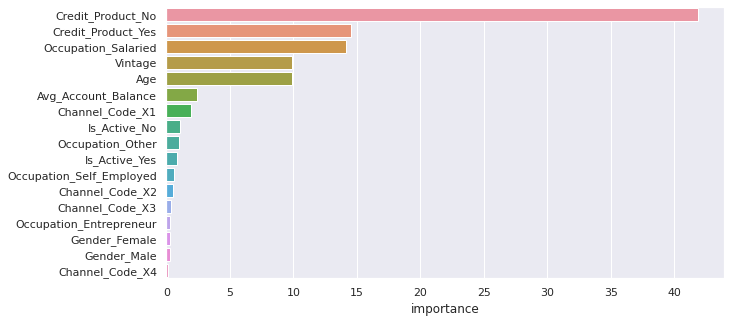

In [318]:
plt.figure(figsize=(10,5))
sns.barplot(x=f_importance_df.importance[:500], y=f_importance_df.index[:500]);

#### Light Gradient Boosting Machine Classifier

In [319]:
import lightgbm as lgb

In [320]:
params = {
    'metric': 'auc',
    'seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND
}

In [321]:
clf = lgb.LGBMClassifier(**params)

In [322]:
clf.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=100, verbose=-1)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.873957


LGBMClassifier(metric='auc', n_estimators=10000, seed=2021)

In [323]:
ypred_lgb = clf.predict_proba(X_valid)[:,1]

In [324]:
roc_auc_score(y_valid, ypred_lgb)

0.8739571497967686

It has been observed that **Cat Boost Classifier** is giving best roc_auc_score : **0.8743951349923654** in comparison to other models.

Testing Cat Boost Clasifier on test.csv and submitting the final result.

In [325]:
submission = pd.read_csv('../input/jobathon-may-2021/sample_submission_eyYijxG.csv')
final_predictions = bst.predict(test)
submission['Is_Lead'] = final_predictions
submission.to_csv('finalsubmission.csv', index=False)